In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2**16 # FFT size
M = 2**5 # decimation factor

Nsamples = 100*N
w = np.cos(np.linspace(-np.pi/2,np.pi/2,N))**2 # window before decimation
ww = np.cos(np.linspace(-np.pi/2,np.pi/2,N//M))**2 # window after decimation
f = np.linspace(-0.5,0.5,Nsamples)
x = np.exp(1j*2*np.pi*np.cumsum(f)) # input signal: frequency sweep
x0 = x.reshape((Nsamples//N,N))*w # signal for FFT with overlap phase 0
x1 = x[N//2:-N//2].reshape((Nsamples//N-1,N))*w # signal for FFT with overlap phase 1/2
y0 = (ww*np.fft.ifft(np.fft.fftshift(np.fft.fft(x0)[:,:N//M], axes=1))).ravel() # decimated signal with overlap phase 0
y1 = (ww*np.fft.ifft(np.fft.fftshift(np.fft.fft(x1)[:,:N//M], axes=1))).ravel() # decimated signal with overlap phase 1
pad = np.zeros(N//(2*M))
y1 = np.concatenate((pad, y1, pad))
y = y0 + y1 # output signal

(-200, 50)

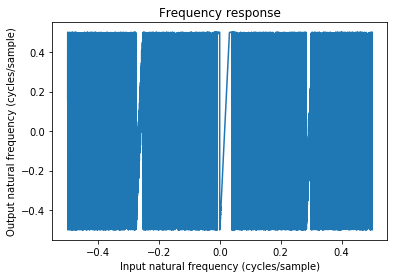

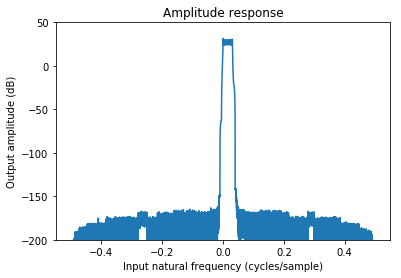

In [3]:
plt.plot(f[::M][:-1],np.diff(np.unwrap(np.angle(y)))/(2*np.pi))
plt.title('Frequency response')
plt.xlabel('Input natural frequency (cycles/sample)')
plt.ylabel('Output natural frequency (cycles/sample)')
plt.figure()
plt.title('Amplitude response')
plt.xlabel('Input natural frequency (cycles/sample)')
plt.ylabel('Output amplitude (dB)')
plt.plot(f[::M], 20*np.log10(np.abs(y)))
plt.ylim([-200,50])